In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math as m
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from math import exp, pow
import pylab
from scipy.interpolate import interp1d
%matplotlib inline

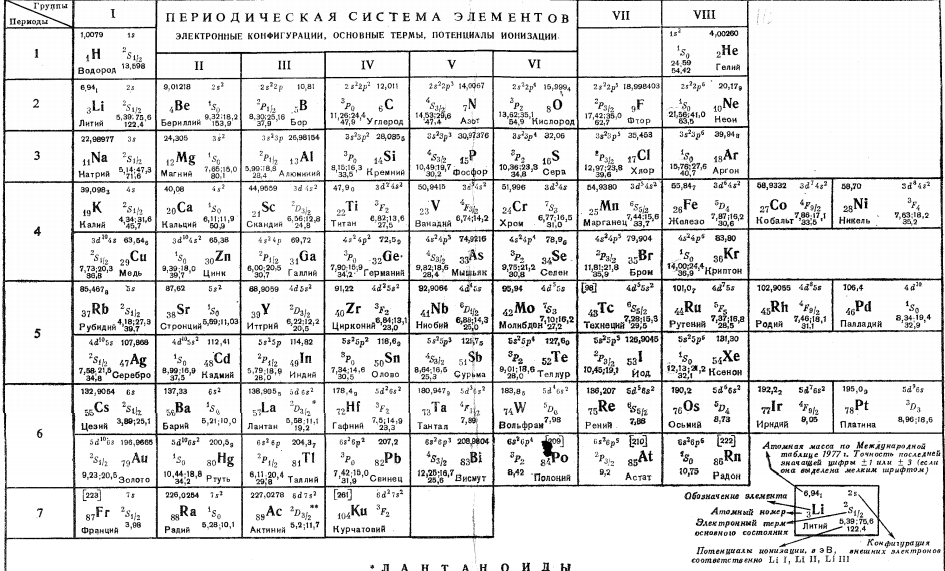

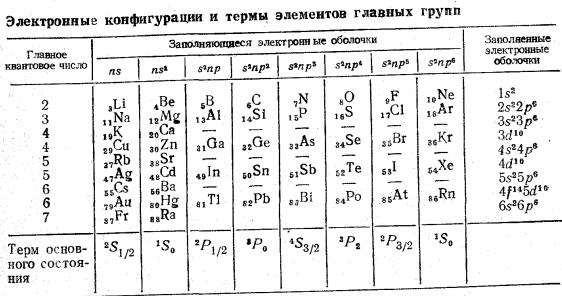

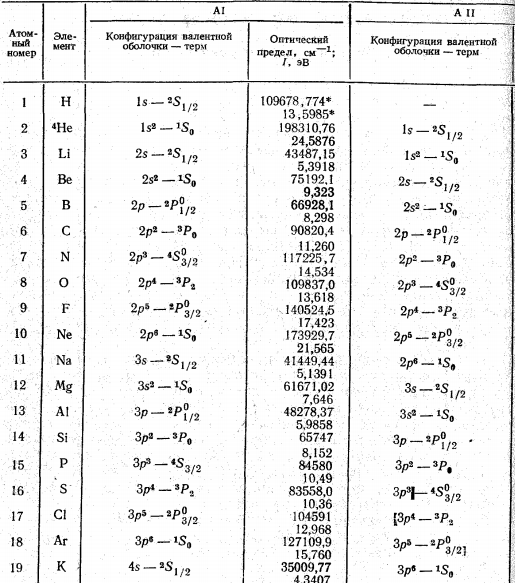

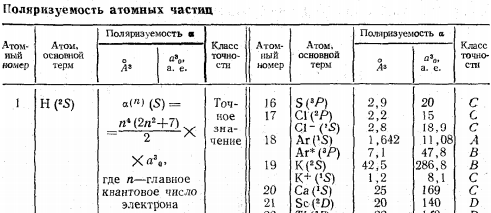

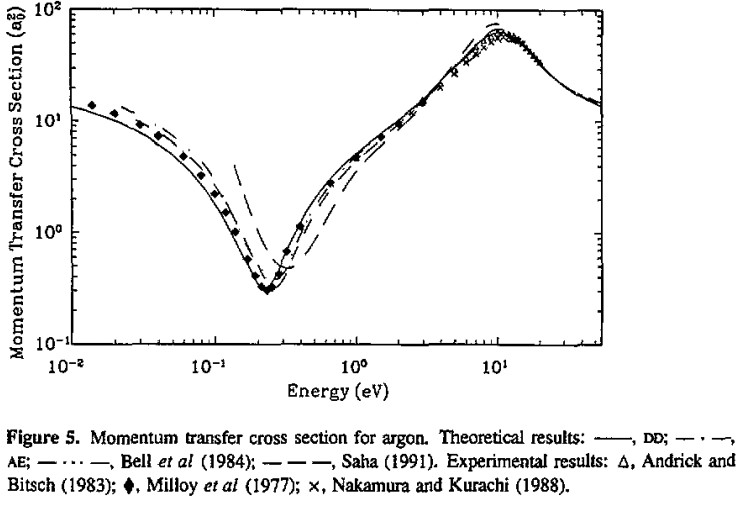

In [124]:
#Параметры задачи
Tstart = 1000 
Tend = 30000
Tstep = 100
xstart = 0.00001 
xend = 0.03
xstep = 0.0000005
atm = 1

#Постоянные и коэффициенты перевода
c = 3e10
aem = 1.66054e-27
evToT = 11604.52500617
h = 6.626e-34
pi = 3.1415926535
e = 1.6021766e-19
P = 101325 * atm
k = 1.380648e-23
m = 9.1e-31
I = 24.6 * evToT #Cl = 12.96
h_ = h / (2 * pi)
tr = 200

gi = 2 #Cl = 6
ge = 2
za = 1 #Cl = 6

#Исследуемые химические элементы
Ar = {"I" : 15.76 * evToT, "gi": 1, "za": 1, "sigma":0.54399999999999973e-16} #1e-21 0.10399999999999973e-17
K  = {"I" : 4.34 * evToT, "gi": 2, "za": 1, "sigma": 5e-14} #200e-20 2e-14

In [125]:
T_graph = np.arange(Tstart, Tend + Tstep, Tstep)
x_graph = np.arange(xstart, xend + xstep, xstep)
print(len(T_graph))
print(len(x_graph))

291
59981


In [126]:
def Saha_Nonideal(El, T_graph):
    alpha_graph = []
    f_graph = []
    alpha_graph_ideal = []
    diff = alpha = G = rd = 0;
    ne = 0.1;
    popr = 1;
    for T in T_graph:
        P_id = P / popr;
        n0 = P_id / (T * k);
        G = (3.42e-07 * pow(ne, 0.5) ) / (pow(T, 1.5)); #4.4e18* e * e * e * 
        rd = e * e / (G * T);
        z2 =  2 * ne / (2 * ne + n0);
        popr = (1 - G * z2 / 6);
        TempMass = pow((m * T * k / (2 * pi * h_ * h_)), 1.5);
        Ion = exp(- El["I"] / T + G);
        Ion_id = exp(- El["I"] / T);
        f = (ge * El["gi"] / El["za"]) * TempMass * T * k * popr / P * Ion;
        f_id = (ge * El["gi"] / El["za"]) * TempMass * T * k / P * Ion_id;
        alpha = f / (1 + f);
        alpha_id = f_id / (1 + f_id);
        
        f_graph.append(f)
        alpha_graph.append(alpha)
        alpha_graph_ideal.append(alpha_id)
        ne = alpha * n0 / (1 + alpha);
    return alpha_graph, alpha_graph_ideal, f_graph

def sigma(x, T, s, sigma_Ar, sigma_K):
    sigma_graph = []
    A = (tr * T * e * e * (P * s / T)**(1/2)) / (P * m * (3 * T * k / m)**(1/2))
    sigma_graph = (A * (x)**(1/2) ) / (sigma_K * (x + sigma_Ar/sigma_K))
    #sigma_graph.append(num)
    return sigma_graph

def sigma_T(x, T, s, sigma_Ar, sigma_K):
    sigma_graph = []
    for T in T_graph:
        index = T_graph.tolist().index(T)
        A = (tr * T * e * e * ( P * s[index] / T)**(1/2)) / (P * m * ( 3 * T * k / m)**(1/2))
        num = (A * (x)**(1/2) ) / (sigma_K * (x + sigma_Ar/sigma_K))
        sigma_graph.append(num)
    #sigma_graph.append(num)
    return sigma_graph

In [127]:
alpha_graph_K, alpha_graph_K_id, f_K = Saha_Nonideal(K, T_graph)
alpha_graph_Ar, alpha_graph_Ar_id, f_Ar = Saha_Nonideal(Ar, T_graph)
sigma_graph = sigma(x_graph, T_graph[13], f_K[13], Ar["sigma"] ,K["sigma"])
#print(f_K)
sigma_graph_T = sigma_T(0.01, T_graph, f_K, Ar["sigma"] ,K["sigma"])


print(alpha_graph_Ar[14])
print(alpha_graph_K[14])
    #out << T << " " << alpha << " " << G << " " << ne << " " << rd  << " " << alpha - alpha_id << "\n";
#print(sigma_graph.tolist().index(max(sigma_graph)))
print(x_graph[1020])


1.49129462698746e-31
2.8594130346919367e-07
0.0005200000000000003


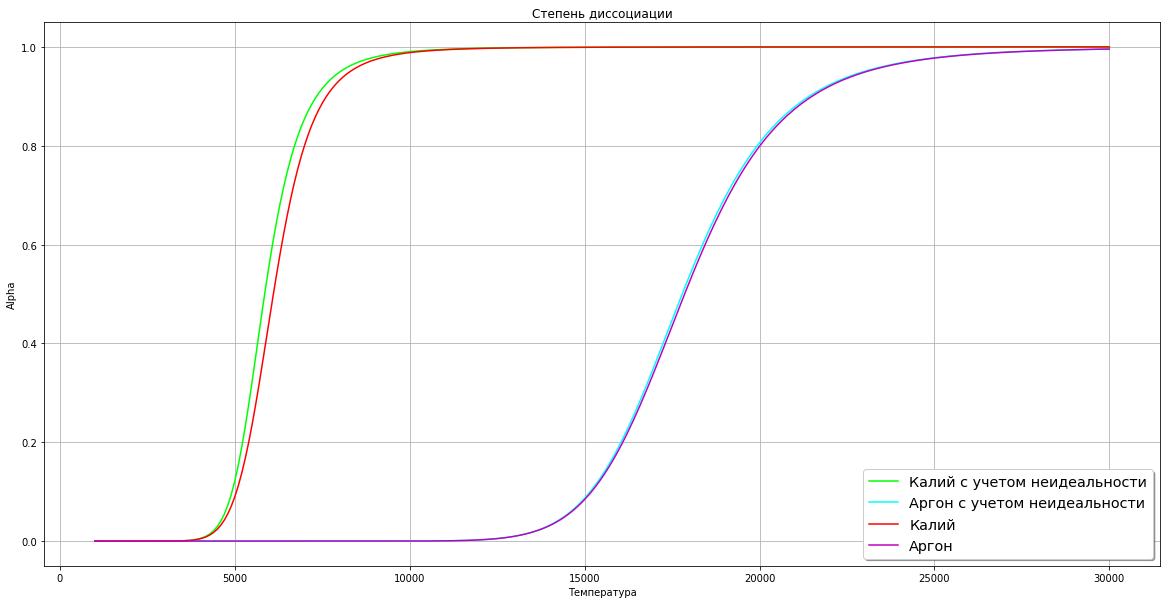

In [128]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(T_graph, alpha_graph_K, 'lime', label='Калий с учетом неидеальности')
ax.plot(T_graph, alpha_graph_Ar, 'aqua', label='Аргон с учетом неидеальности')
ax.plot(T_graph, alpha_graph_K_id, 'r', label='Калий')
ax.plot(T_graph, alpha_graph_Ar_id, 'm', label='Аргон')

ax.set_title(u'Степень ионизациации')

ax.yaxis.set_label_position('left')
ax.set_ylabel(u'Alpha')

ax.xaxis.set_label_position('bottom')
ax.set_xlabel(u'Температура')
legend = ax.legend(loc='best', shadow=True, fontsize='x-large')

legend.get_frame().set_facecolor('white')
ax.grid(True)
plt.show()

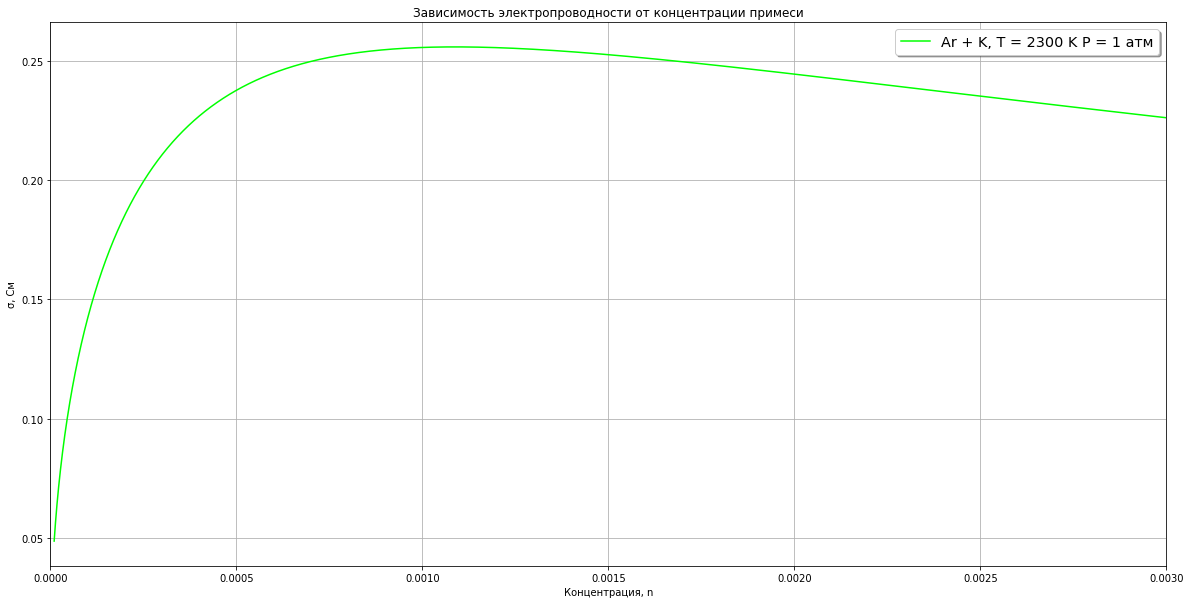

In [129]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(x_graph, sigma_graph, 'lime', label='Ar + K, T = 2300 K P = 1 атм')

ax.set_title(u'Зависимость электропроводности от концентрации примеси')

ax.yaxis.set_label_position('left')
ax.set_ylabel(u'\u03C3, См')

ax.xaxis.set_label_position('bottom')
ax.set_xlabel(u'Концентрация, n')
legend = ax.legend(loc='best', shadow=True, fontsize='x-large')

plt.xlim([0, 0.003])
legend.get_frame().set_facecolor('white')
ax.grid(True)
plt.show()

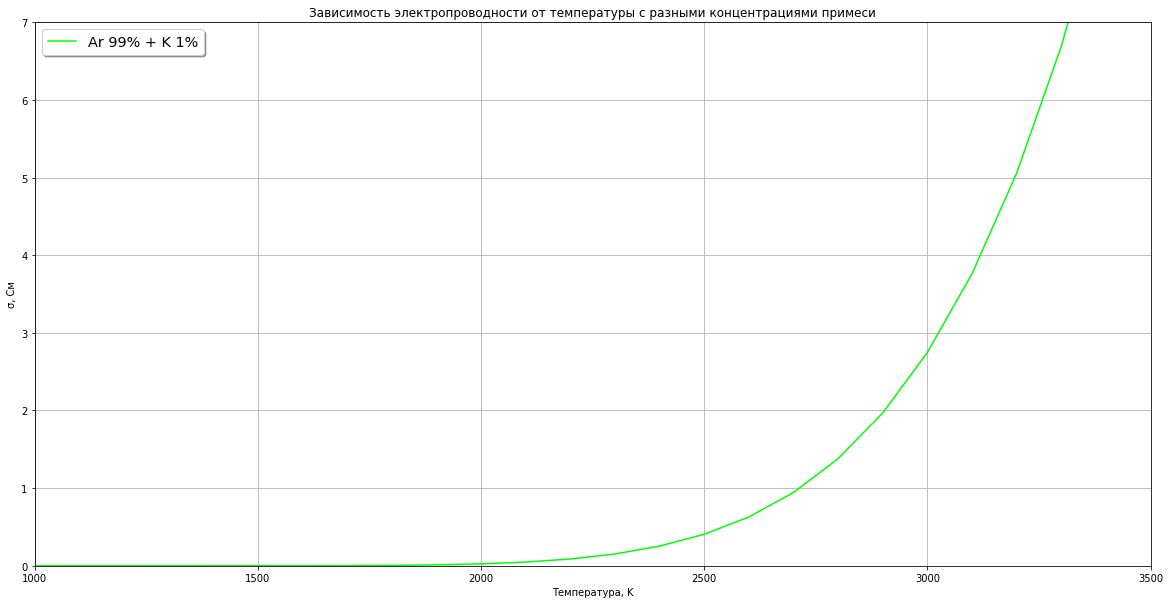

In [131]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(T_graph, sigma_graph_T, 'lime', label='Ar 99% + K 1%')

ax.set_title(u'Зависимость электропроводности от температуры с разными концентрациями примеси')

ax.yaxis.set_label_position('left')
ax.set_ylabel(u'\u03C3, См')

ax.xaxis.set_label_position('bottom')
ax.set_xlabel(u'Температура, K')
legend = ax.legend(loc='best', shadow=True, fontsize='x-large')

plt.xlim([1000, 3500])
plt.ylim([0, 7])

legend.get_frame().set_facecolor('white')
ax.grid(True)
plt.show()

Text(0, 0.5, 'Height')

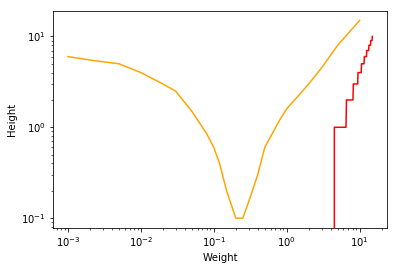

In [132]:
data = pd.read_csv('Ar_sigma.csv')
fig, ax = plt.subplots()
coeffs = np.polyfit(data['Ev'], data['sigma'], 2)
def p_Ar(x):
    return coeffs[0] * x **2 + coeffs[1] * x + coeffs[2]
rr = np.arange(0.10, 15, 0.1)
ax.plot(data['sigma'], data['Ev'], "orange", rr, p_Ar(rr).astype(np.int), 'r')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Weight')
ax.set_ylabel('Height')